In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Embedding, Flatten, Dense # type: ignore
from tensorflow.keras.metrics import AUC # type: ignore
from sklearn.metrics import roc_curve, auc

In [2]:
# Hyperparameters
max_words = 5000  # Maximum number of words to keep based on frequency
max_len = 100     # Maximum length of sequences (number of words per email)
embedding_dim = 128  # Dimension of the embedding vector
batch_size = 64      # Number of samples per gradient update
epochs = 5   

In [19]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Data analyst intern\\spam.csv",encoding='latin1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Rename columns for clarity
df = df.rename(columns={'v1': 'label', 'v2': 'text'})

# Encode the labels
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

# Tokenize and pad the text
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
data = pad_sequences(sequences, maxlen=max_len)


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, df['label'].values, test_size=0.2, random_state=42)

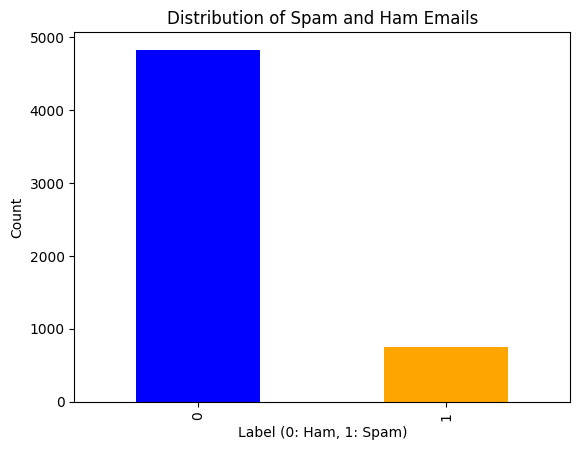

In [6]:
import matplotlib.pyplot as plt

# Plot the distribution of labels
df['label'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

Build the Model

In [7]:
# Build the ANN model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8923 - auc: 0.8132 - loss: 0.3073 - val_accuracy: 0.9767 - val_auc: 0.9855 - val_loss: 0.0851
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9888 - auc: 0.9957 - loss: 0.0466 - val_accuracy: 0.9848 - val_auc: 0.9879 - val_loss: 0.0541
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9954 - auc: 0.9993 - loss: 0.0182 - val_accuracy: 0.9839 - val_auc: 0.9840 - val_loss: 0.0555
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9984 - auc: 0.9999 - loss: 0.0069 - val_accuracy: 0.9857 - val_auc: 0.9898 - val_loss: 0.0522
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9999 - auc: 1.0000 - loss: 0.0028 - val_accuracy: 0.9821 - val_auc: 0.9820 - val_loss: 0.0690


In [10]:
# Evaluate the model
loss, accuracy, auc_score = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'AUC Score: {auc_score:.2f}')

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - auc: 0.9894 - loss: 0.0421
Accuracy: 98.21%
AUC Score: 0.98


In [11]:
# Predict probabilities for the test set
y_pred_prob = model.predict(X_test).ravel()


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


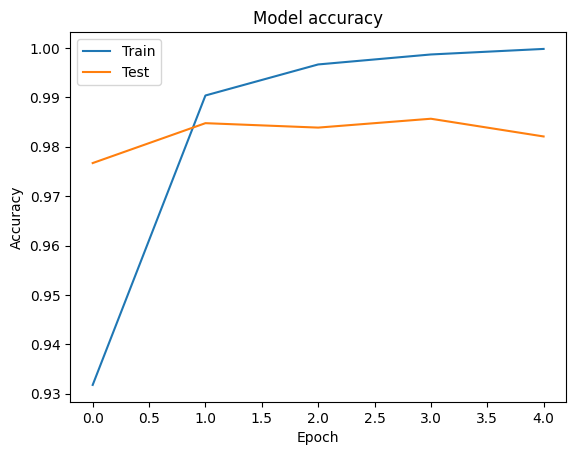

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()